In [2]:
#pip install ppscore


   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   United-States   <=50

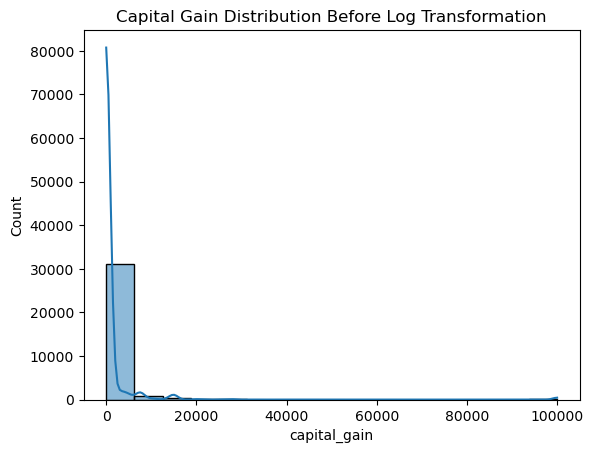

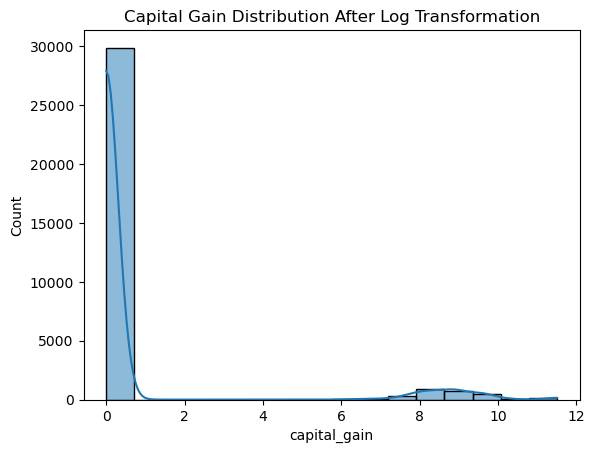

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\s

PPS Matrix:
y                            age  age_group  capital_gain  capital_loss  \
x                                                                         
age                     1.000000   1.000000           0.0           0.0   
age_group               0.533785   1.000000           0.0           0.0   
capital_gain            0.000975   0.008850           1.0           0.0   
capital_loss            0.000000   0.000000           0.0           1.0   
education               0.017182   0.029375           0.0           0.0   
education_num           0.017182   0.029375           0.0           0.0   
fnlwgt                  0.000000   0.060164           0.0           0.0   
hours_per_week          0.002521   0.171026           0.0           0.0   
income                  0.030081   0.000000           0.0           0.0   
marital_status          0.199767   0.262430           0.0           0.0   
native_country          0.000000   0.000000           0.0           0.0   
occupation   

C:\Users\Dell\AppData\Local\Temp\ipykernel_16780\1606657814.py:85: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_cleaned.corr()


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
import ppscore as pps

# Load the dataset
file_path = "C:/Users/Dell/Downloads/EDA2/EDA2/adult_with_headers.csv"
data = pd.read_csv(file_path)

# Basic data exploration
print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())

# Handle missing values (if any)
# There are no missing values in this dataset as per the provided information

# Apply Scaling Techniques to Numerical Features
numerical_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

# Standard Scaling
scaler_standard = StandardScaler()
data_standard_scaled = data.copy()
data_standard_scaled[numerical_features] = scaler_standard.fit_transform(data_standard_scaled[numerical_features])

# Min-Max Scaling
scaler_minmax = MinMaxScaler()
data_minmax_scaled = data.copy()
data_minmax_scaled[numerical_features] = scaler_minmax.fit_transform(data_minmax_scaled[numerical_features])

# Apply One-Hot Encoding and Label Encoding
# One-Hot Encoding for categorical variables with less than 5 categories
categorical_features_onehot = ['sex', 'income']
data_onehot_encoded = pd.get_dummies(data, columns=categorical_features_onehot, drop_first=True)

# Label Encoding for categorical variables with more than 5 categories
label_encoder = LabelEncoder()
categorical_features_label = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']
data_label_encoded = data.copy()
for col in categorical_features_label:
    data_label_encoded[col] = label_encoder.fit_transform(data_label_encoded[col])

# Feature Engineering: Create new features
# Create age_group feature
data['age_group'] = pd.cut(data['age'], bins=[0, 25, 50, 75, 100], labels=['young', 'adult', 'senior', 'elder'])

# Create working_hours_per_week feature
data['working_hours_per_week'] = data['hours_per_week'] // 10

# Apply Transformation to Skewed Numerical Feature
# Plot distribution of capital_gain before transformation
sns.histplot(data['capital_gain'], kde=True)
plt.title('Capital Gain Distribution Before Log Transformation')
plt.show()

# Apply log transformation
data['capital_gain'] = np.log1p(data['capital_gain'])

# Plot distribution of capital_gain after transformation
sns.histplot(data['capital_gain'], kde=True)
plt.title('Capital Gain Distribution After Log Transformation')
plt.show()

# Feature Selection: Use Isolation Forest for outlier detection
# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(data[numerical_features])

# Remove outliers
data_cleaned = data[outliers == 1]

# Feature Selection: PPS (Predictive Power Score) Analysis
# Calculate PPS matrix
pps_matrix = pps.matrix(data_cleaned)[['x', 'y', 'ppscore']].pivot(columns='y', index='x', values='ppscore')

# Display PPS matrix
print("PPS Matrix:")
print(pps_matrix)

# Calculate correlation matrix
correlation_matrix = data_cleaned.corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)
